<h1><center>Identificação de sistemas de segunda ordem utilizando redes neurais da bliblioteca pytorch</center></h1>

By: Nei Junior da Silva Farias

# Importação das bicliotecas utilizadas

In [22]:
import torch                         # Biblioteca de redes neurais utilizada
from torch import nn, optim                # Importação do componente de geração, treinamento e teste da rede
import numpy as np
from numpy.random import normal      # Import do gerador de sinal aleatório
from scipy.integrate import odeint   # Import do integrador utilizado para simular o sistema identificado
import matplotlib.pyplot as plt      # Import da biblioteca para plot de gráficos
from torch.utils.data import Dataset, DataLoader

# Representação de sistemas de segunda Ordem

Os sistemas de segunda ordem pode ser representados pela função de transferência:

<h2><center>
    $G(s)=\frac{y(t)}{u(t)} = \frac{\omega_0^2}{s^2+2\zeta\omega s + \omega_0^2}$
</h2></center>

A representação diferencial da função de transferência pode ser dada por:

<h2><center>
    $\frac{d^2y(t)}{dt^2} + 2\zeta\omega \frac{dy(t)}{dt} +\omega_0^2y(t) = \omega_0^2u(t)$
</h2></center>

A escolhermos as variáveis de estados $x_1 = y(t)$ e $x_2 = \frac{dy(t)}{dt}$ o sistema pode ser reescrito como:

<h2><center>
    $\begin{matrix}
    \dot{x}_1 = x_2 \\
    \dot{x}_2= - 2\zeta\omega x_2 - \omega_0^2x_1 + \omega_0^2u(t)
    \end{matrix}$
</h2></center>

Onde:

<h2><center>
    $\begin{matrix}
    y(t) = x_1(t)
    \end{matrix}$
</h2></center>

## Classe de sistema de segunda ordem pytho

In [84]:
class modelo_de_segunda_ordem:
    def __init__(self,zeta,w0):
        self.zeta = zeta
        self.w0 = w0
    def model(self,z0 ,t_estp,u):
        x1 = z0[0]
        x2 = z0[1]
        dx1dt = x2
        dx2dt = -(2*self.zeta)*x2-(self.w0**2)*x1 + self.w0**2*u
        dzdt = [dx1dt,dx2dt]
        return dzdt
    def simulacao(self,z0,t_estp,u):
        return odeint(self.model,z0,t_estp,args = (u,))

### Obteção do coeficiente de amortecimento e frequência de oscilação

In [85]:
tempo_de_acomodacao = 3; # tempo em segundos
maximo_sobressinal = 10; # Em porcentos
zeta = (-np.log(maximo_sobressinal/100))/(np.sqrt((np.pi)**2+np.log(maximo_sobressinal/100)**2))
w0 = 3/(zeta*tempo_de_acomodacao)

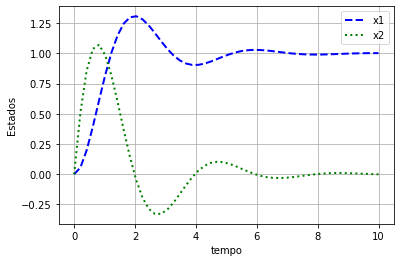

In [86]:
modelo_2_ordem = modelo_de_segunda_ordem(zeta = zeta, w0 = w0)

tprint =  np.linspace(0,10,50)
z0 = [0,0] # Condição inicial
degrau = 1;
z = modelo_2_ordem.simulacao(z0 = z0, t_estp = tprint, u = degrau)
x1 = z[:,0]
x2 = z[:,1]
plt.plot(tprint,x1,'b--',linewidth=2,label='x1')
plt.plot(tprint,x2,'g:',linewidth=2,label='x2')
plt.xlabel('tempo')
plt.ylabel('Estados')
plt.legend()
plt.grid(True)
plt.show()



## Definição do modelo de referência de primeira ordem

<h2><center>
    $G_r(s)=\frac{y_r(t)}{u_r(t)} = \frac{K}{\tau s + 1}$
</h2></center>

Onde:

* $K$ é o ganho do modelo de referência;
* $\tau$ é a constante de tempo do modelo.

O modelo em espaços de estados pode ser obtido como:

<h2><center>
    $\dot{y}(t) =-\frac{y(t)}{\tau}+\frac{Ku_r(t)}{\tau} $ 
</h2></center>

In [ ]:
class modelo_de_primeira_ordem:
    def __init__(self,K,tau):
        self.K   = K
        self.tau = tau
    def simulacao(z,t_estp,u):
        x1 = z[0]
        x2 = z[1]
        dx1dt = x2
        dx2dt = -(2*self.zeta)*x2-(self.w0**2)*x1 + self.w0**2*u
        dzdt = [dx1dt,dx2dt]
        return dzdt